In [1]:
# importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

import sklearn.linear_model, sklearn.datasets # sklearn is an important package for much of the ML we will be doing, this time we are using the Linear Regression Model and the datasets
from sklearn import kernel_ridge 
print ("Ready")

Ready


In [2]:
#Loading the Dataset

url = "/content/Comp1801CourseworkData.csv" # Creating a path to the file

df = pd.read_csv (url, delimiter=",")

df.head() #Visualising

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


# Encoding the dataset using label encoder

In [3]:
from sklearn import preprocessing
d= preprocessing.LabelEncoder()
for i in range (0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]]=d.fit_transform(df[df.columns[i]])
        
df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49
1,20,3758.36,149.36,4,2,0,0,7,42965.45
2,36,601.72,21.87,0,3,0,1,1,54924.41
3,21,44.89,182.80,9,3,0,0,5,26734.99
4,24,614.80,194.34,0,2,0,1,6,15325.23


# shuffling dataset 

In [4]:
rng = np.random.default_rng(0)
df = df.iloc[rng.permutation(len(df))].reset_index(drop=True)

# converting data to array

In [6]:
col =['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression','WorkType', 'Education', 'Sex','Region']
X = np.array(df[col])
y = np.array(df['Salary']) #target 

# Splitting the dataset into train and test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCALING THE VARIABLE

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform (X_train)
X_test = scalar.transform(X_test)

# LINEAR REGRESSION

In [10]:
from sklearn.linear_model import LinearRegression

obj = sklearn.linear_model.LinearRegression()
obj.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predicting new salaries using Linear Regression
y_pred = obj.predict(X_test)

y_pred [0:10]

array([56428.49118728, 29784.98799812, 35897.52836414, 50070.3542535 ,
       28901.58148901, 48372.31131101, 55721.54291503, 59666.15127259,
       26167.87778633, 41283.56039586])

In [15]:
r2_score(y_test, y_pred)

0.2405056654613531

In [16]:
score = obj.score(X_test, y_test)
print(score)

0.2405056654613531


# Extra Tree Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import ExtraTreesRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
reg.score(X_test, y_test)

0.8866133071762954

# Random forest Regression

In [18]:
from sklearn.ensemble import RandomForestRegressor
h2 = RandomForestRegressor(n_estimators=100, random_state=42)
h2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred2 = h2.predict(X_test)

y_pred2 [0:10]

array([50119.8538, 17954.4892, 25397.6463, 30758.0031, 58838.6683,
       38215.2704, 40725.5719, 30127.7439, 22133.5963, 52146.8867])

In [20]:
score2 = h2.score(X_test, y_test)
print(score2)

0.8821095370785542


In [21]:
X_train2 = np.array(df['Age'])

# PART 4 BINARY CLASSIFICATION

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,43,1877.77,50.30,2,1,0,0,6,64891.98
1,38,265.03,71.00,0,1,0,1,7,57963.67
2,24,624.06,87.70,3,4,0,0,6,14969.50
3,34,3185.07,194.51,7,6,0,0,11,71403.80
4,52,141.47,290.55,5,2,0,1,6,26001.26


In [24]:
df['Salary New'] = df['Salary'].apply(lambda x: 0 if x <= 35000 else 1)
df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,Salary New
0,43,1877.77,50.30,2,1,0,0,6,64891.98,1
1,38,265.03,71.00,0,1,0,1,7,57963.67,1
2,24,624.06,87.70,3,4,0,0,6,14969.50,0
3,34,3185.07,194.51,7,6,0,0,11,71403.80,1
4,52,141.47,290.55,5,2,0,1,6,26001.26,0


# CHECKING FOR CLASS DISTRIBUTION

In [25]:
print("Class distribution:\n", df['Salary New'].value_counts())

Class distribution:
 1    631
0    369
Name: Salary New, dtype: int64


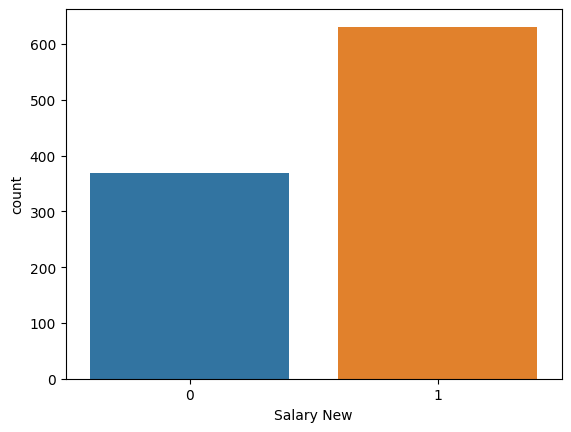

In [26]:
# Visualize class distribution
sns.countplot(x='Salary New', data=df)
plt.show()

# Decision tree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
X_class = df[['Age', 'Sex', 'WorkType','Education', 'SiteSpending', 'SiteTime','RecommendImpression']]
y_class = df[['Salary New']]

y2 = ['1', '0']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

clf= DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
score = clf.score(X_test, y_test )
print(score)

0.93


In [ ]:
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 69,   9],
       [  5, 117]])

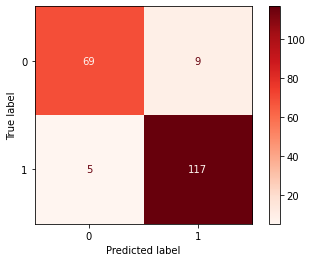

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Reds)
plt.grid(False)

# diplaying the tree clasiffer

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

In [ ]:
dot_data = StringIO
export_graphviz(clf, out_file= dot_data, filled = True, rounded= True,special_characters= True, feature_names= X_class, class_names= y2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png ('Tree.png')

Image(graph.create_png())

ValueError: ignored

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
score2 = log_reg.score(X_test, y_test )
print(score2)

0.635


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 21,  57],
       [ 16, 106]])

# SVM

In [ ]:
import sklearn.svm 

# Create support vector classifier object
obj2 = sklearn.svm.SVC(C=1,kernel='rbf',random_state=40)

# Train the model using the training sets
obj2.fit(X_train, y_train)

# Make predictions using the testing set
y_predS = obj2.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
confusion_matrix(y_test, y_predS)

array([[  0,  73],
       [  0, 127]])

In [ ]:
score2 = obj2.score(X_test, y_test )
print(score2)

0.635


# Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

In [ ]:
X_NN = df[['Age', 'Sex', 'WorkType','Education', 'SiteSpending', 'SiteTime','RecommendImpression']]
y_NN = df[['Salary New']]

In [ ]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_NN, y_NN, test_size=0.2, random_state=42)

In [ ]:
model= Sequential()


model. add(Dense(input_dim=7, units= 4,activation='tanh' ))

model. add(Dense(units= 4,activation='tanh' ))

model. add(Dense(units= 1,activation='sigmoid' ))



model.compile(loss= 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 32        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_nn, y_train_nn, validation_split= 0.2, epochs= 50 )

Epoch 1/50
20/20 [==============================] - 1s 11ms/step - loss: 0.6691 - accuracy: 0.5969 - val_loss: 0.6768 - val_accuracy: 0.5750
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.5969 - val_loss: 0.6742 - val_accuracy: 0.6000
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.5969 - val_loss: 0.6718 - val_accuracy: 0.6187
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6375 - val_loss: 0.6705 - val_accuracy: 0.6187
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.6375 - val_loss: 0.6689 - val_accuracy: 0.6187
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.6375 - val_loss: 0.6676 - val_accuracy: 0.6187
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6375 - val_loss: 0.6666 - val_accuracy: 0.6187
Epoch 8/50
20/20 [=

In [ ]:
Y_test_logit = model.predict (X_test_nn)

7/7 [==============================] - 0s 4ms/step


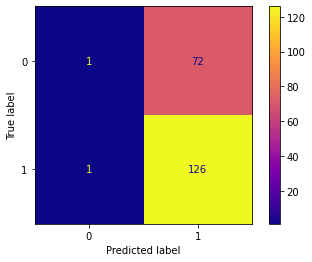

In [ ]:
Y_test_pred = (Y_test_logit > 0.5).astype(int) 
# Evaluate the model by plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test_nn, Y_test_pred[:,0]))
disp.plot(cmap=plt.cm.plasma)
plt.grid(False)

# KMEANS

In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Salary')

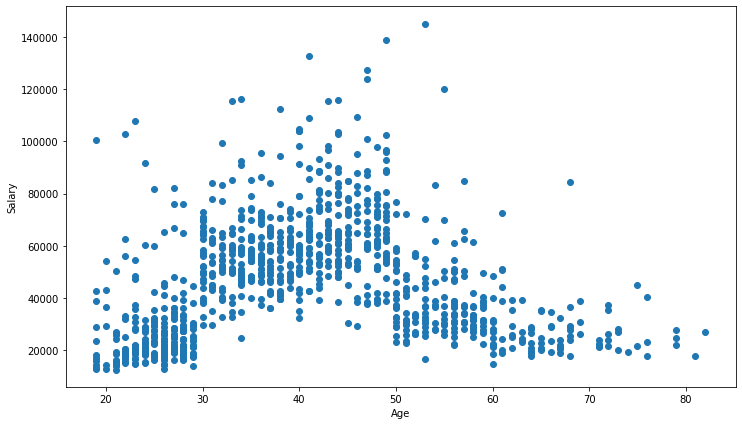

In [ ]:
plt.figure(figsize =(12, 7))
plt.scatter(df['Age'],df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Salary']])
    sse.append(km.inertia_)

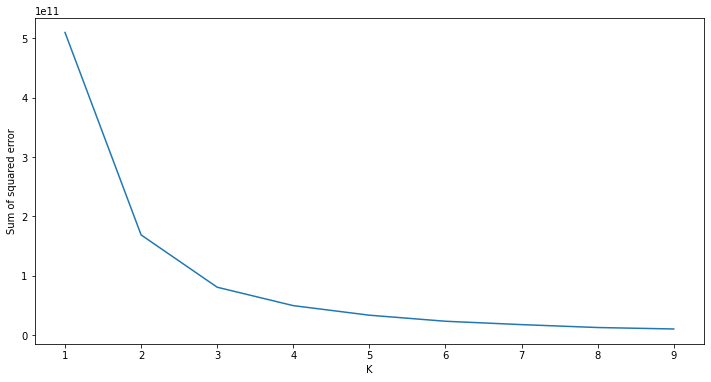

In [ ]:
plt.figure(figsize =(12, 6))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Salary']])
y_predicted

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1,
       0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1,

In [ ]:
df['cluster']=y_predicted
df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,Salary New,cluster
0,32,314.06,30.14,0,1,0,1,2,60173.49,1,0
1,20,3758.36,149.36,4,2,0,0,7,42965.45,1,0
2,36,601.72,21.87,0,3,0,1,1,54924.41,1,0
3,21,44.89,182.80,9,3,0,0,5,26734.99,0,1
4,24,614.80,194.34,0,2,0,1,6,15325.23,0,1


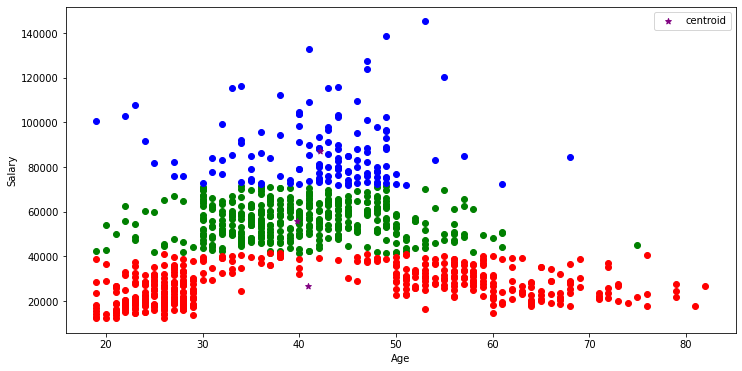

In [ ]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.figure(figsize =(12, 6))
plt.scatter(df1.Age,df1['Salary'],color='green')
plt.scatter(df2.Age,df2['Salary'],color='red')
plt.scatter(df3.Age,df3['Salary'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()